In [33]:
# libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

In [34]:
# load data
reddit = pd.read_csv(
    "/Users/seshat/Documents/GitHub/labor_sentiment_analysis/data/train/reddit_train.csv"
)

In [35]:
# preprocess and vectorize
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(reddit["text"])

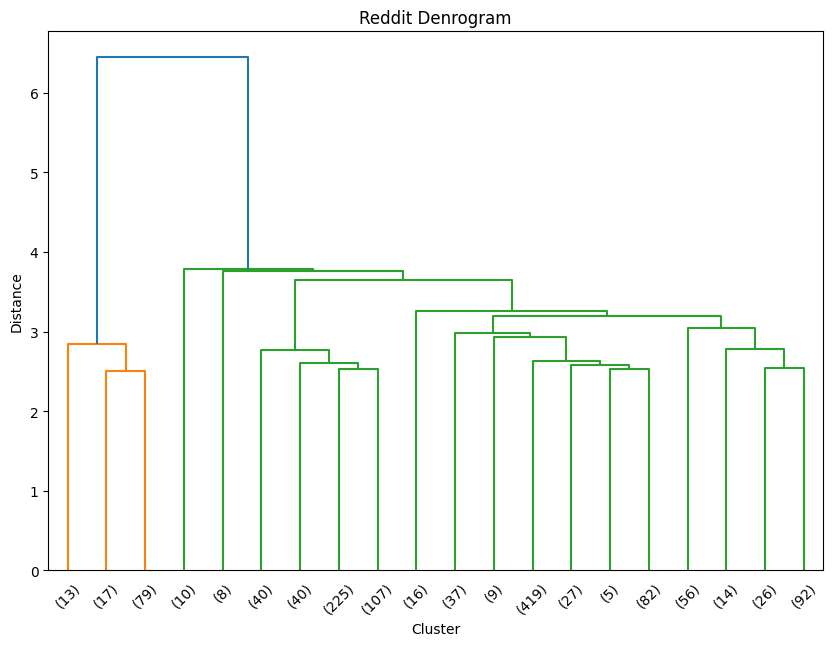

In [36]:
# cluster for exploration
linkage_matrix = linkage(X.toarray(), method='ward')

# plot
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10
)
plt.title("Reddit Denrogram")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()

In [37]:
num_clusters = 3
agglo = AgglomerativeClustering(n_clusters=num_clusters, 
                                metric="euclidean",
                                linkage="ward")

hier_clusters = agglo.fit_predict(X.toarray())
reddit['label_h'] = hier_clusters


In [38]:
# k-means cluster for labeling
kmeans = KMeans(n_clusters=num_clusters, random_state=35)
reddit['label_k'] = kmeans.fit_predict(X)



In [40]:
reddit.to_csv(
    "/Users/seshat/Documents/GitHub/labor_sentiment_analysis/data/train/reddit_labeled.csv",
    index=False,
)